In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable
df = pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
#Check the data dimension
df.shape

(1000, 21)

### Insights:
We have loaded a German credit risk dataset which has 1000 records, 20 independent variables & a dependent variable

In [4]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [5]:
#First let's find out categorical columns in our data
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [6]:
#Now, let's create dummy columns for the all categorical columns
df = pd.get_dummies(df, columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])

### Check for highly correlated variables but don't required any treatment for this use case

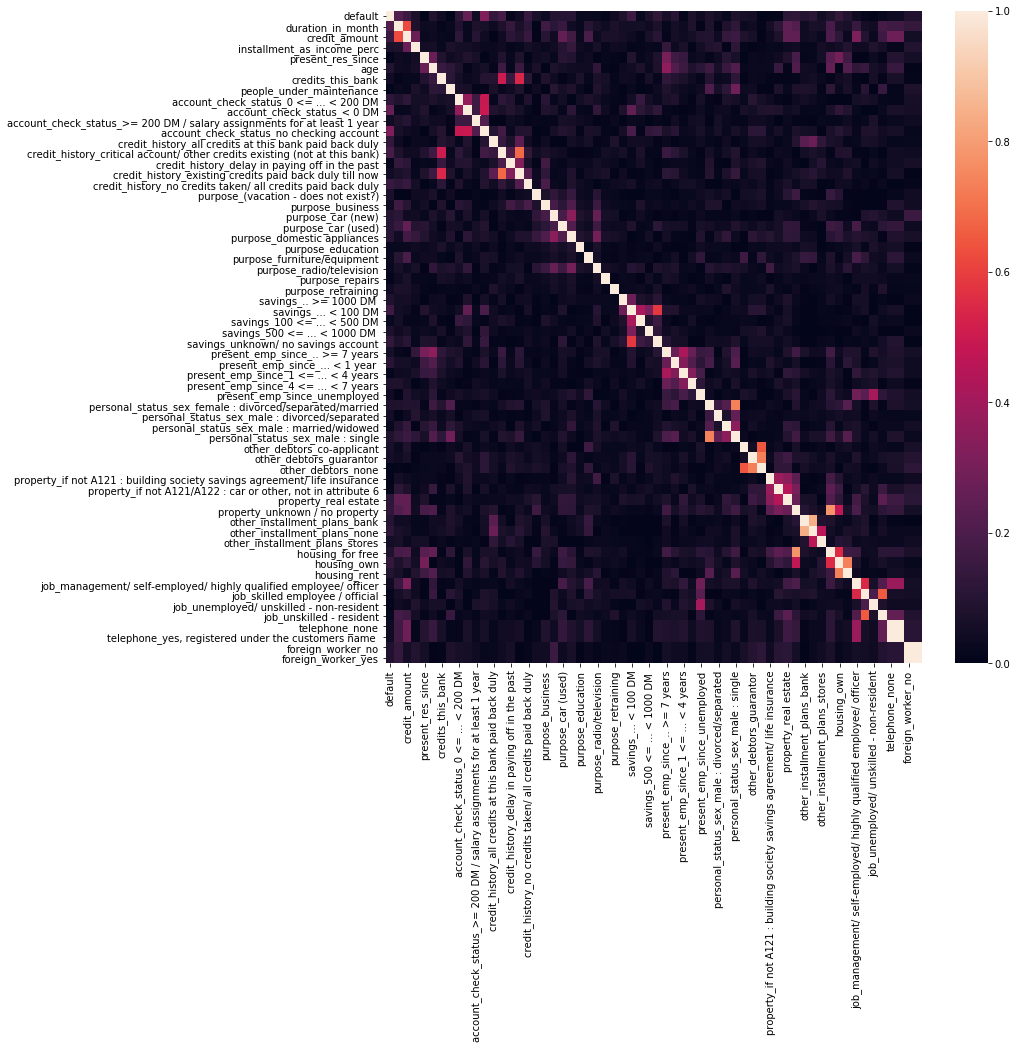

In [7]:
#Correlation
df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(np.abs(df.corr()))
plt.show()

### Insights:
Looking at the heatmap, we see some correlation between following columns:
    
    credit_amount & duration_in_month
    
    credit_history_existing credits paid pack duly till now & credit_history_critical account/ other credits existing (not at this bank)
    
    savings_unknown/ no savings account & savings_... < 100 DM
    
    personal_status_sex_male : single & personal_status_sex_female : divorced/seperated/married
    
    other_debtors_none & other_debtors_co-applicant
    
    other_debtors_none & other_debtors_guarantor
    
    other_installment_plans_none & other_installment_plans_bank
    
    housing_for free & property_unknown / no property
    
    housing_rent & housing_own
    
    job_unskilled - resident & job_skilled employee / official
    
    telephone_yes, registered under the customers name & telephone_none
    
    foreign_worker_yes & foreign_worker_no

There isn't any significant correlation between other columns.

### Drop the original variables which are converted to dummy

In [8]:
#Original variables are automatically dropped when calling get_dummies() method of Pandas

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [9]:
#Importing Train_test_split submodule from model_selection module in sklearn library
from sklearn.model_selection import train_test_split

#Splitting the dataset into Training & testing set in the ration 70:30
train_set, test_set, train_labels, test_labels = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [10]:
#Import RandomForestClassifier submodule from ensemble module in sklearn library
from sklearn.ensemble import RandomForestClassifier

#Initialize model as per instructions
model = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=9999)

#Fit model with training set
model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [11]:
#Import accuracy_score and confusion_matrix submodules from metrics module from sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix

#Predict
y_pred = model.predict(test_set)

#Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

#Print Confusion matrix & Accuracy
print("Confusion matrix is as follows:\n", cm)
print("Accuracy of the model is",accuracy_score(test_labels, y_pred))

Confusion matrix is as follows:
 [[198   8]
 [ 58  36]]
Accuracy of the model is 0.78


### Q6 Show the list of the features importance( 1 Marks)

In [12]:
#Import chi2 & SelectKBest submodules from feature_selection module in sklearn library
from sklearn.feature_selection import chi2, SelectKBest

#Initializing SelectKBest
skb = SelectKBest(score_func = chi2, k = 4)

#Fit SelectKBest model with training set
skb.fit(train_set, train_labels)

#Iterate through all columns & get the scores & pvalues in feature_score
feature_score =  [(item, score, pvalue)
                 for item, score, pvalue in zip(train_set.columns, skb.scores_, skb.pvalues_)]

#Print the feature_score
print("Feature importance is as below:")
feature_score

Feature importance is as below:


[('duration_in_month', 180.7712774833033, 3.288676073719814e-41),
 ('credit_amount', 39711.722949265684, 0.0),
 ('installment_as_income_perc', 0.6288825654435588, 0.4277654926696358),
 ('present_res_since', 0.0043098762465599155, 0.9476567611685448),
 ('age', 13.739216257061575, 0.0002100231126289955),
 ('credits_this_bank', 0.21403785359457728, 0.6436208174313678),
 ('people_under_maintenance', 0.026378167388143296, 0.8709801862027019),
 ('account_check_status_0 <= ... < 200 DM',
  3.6884587954052037,
  0.054790221595128134),
 ('account_check_status_< 0 DM', 30.646947840100633, 3.0951309854951534e-08),
 ('account_check_status_>= 200 DM / salary assignments for at least 1 year',
  0.9514205773786754,
  0.32935796499558584),
 ('account_check_status_no checking account',
  34.676131501845894,
  3.8937651877450765e-09),
 ('credit_history_all credits at this bank paid back duly',
  7.751268829960709,
  0.005367481736701487),
 ('credit_history_critical account/ other credits existing (not a

In [13]:
#Let's get count of important features by selecting only features whose pvalue < 0.05 & preparing a list of features to be dropped
count = 0
features_to_drop = []
for i in range(train_set.shape[1]):
    if feature_score[i][2] < 0.05:
        count += 1
    else:
        features_to_drop.append(feature_score[i][0])
print("No. of important features are", count)

No. of important features are 23


In [14]:
df_transform = df.drop(features_to_drop, axis=1)

In [15]:
#Before proceeding, let's split the transformed data again
X_train, X_test, y_train, y_test = train_test_split(df_transform.iloc[:,1:], df_transform.iloc[:,0], test_size=.3)

#And also re-train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [16]:
#Import KFold & cross_val_score submodules from model_selection modules in sklearn Library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
# Use below values
num_folds = 10
seed = 77

In [18]:
#Validate the Random Forest model build above using k fold

In [19]:
#Initialize KFold
kfold = KFold(n_splits=num_folds, random_state=seed)

#Apply KFold validation with previous Random Forest Model
result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

#Print the result
print("Results of KFold validation on Random Forest are:")
print(result)

Results of KFold validation on Random Forest are:
[0.7        0.8        0.77142857 0.74285714 0.84285714 0.68571429
 0.71428571 0.74285714 0.67142857 0.72857143]


In [20]:
#Calculate Mean score

In [21]:
#Print Mean score
print("Mean score of KFold validation on Random Forest is", result.mean())

Mean score of KFold validation on Random Forest is 0.74


In [22]:
# Calculate score standard deviation using std()

In [23]:
#Print Standard deviation
print("Standard deviation of KFold validation on Random Forest is", result.std())

Standard deviation of KFold validation on Random Forest is 0.050223988089277014


# Q8 Print the confusion matrix( 1 Marks)

In [24]:
#Get y prediction of the model
y_pred = model.predict(X_test)

#Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Print confusion matrix
print("Confusion matrix is as follows:\n", conf_mat)

Confusion matrix is as follows:
 [[188  21]
 [ 59  32]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [25]:
#Import classification_report submodule from metrics module in sklearn library
from sklearn.metrics import classification_report
print("Classification Report for the data is:\n", classification_report(y_test, y_pred))

Classification Report for the data is:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.60      0.35      0.44        91

    accuracy                           0.73       300
   macro avg       0.68      0.63      0.63       300
weighted avg       0.71      0.73      0.71       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [26]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [27]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [28]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7376666666666667
Standard deviation:  0.01116044602852213
